In [9]:
import warnings                               
warnings.filterwarnings('ignore')

import numpy as np                              
import pandas as pd 

from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

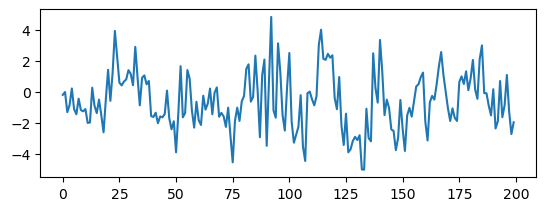

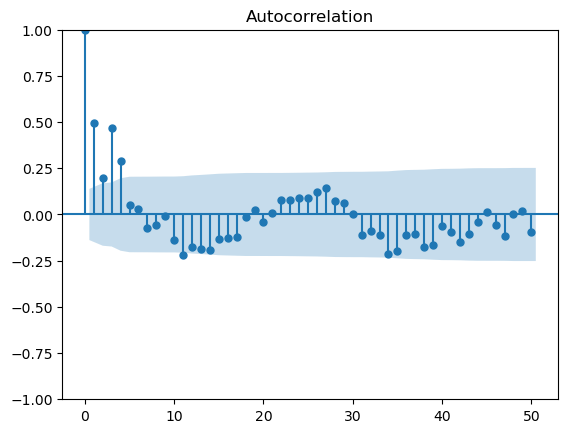

In [2]:
ar = np.array([1])
ma = np.array([1, 0.9, 0, 1, 1.2])
MA_object = ArmaProcess(ar, ma)
MA_data =  MA_object.generate_sample(nsample=200)


plt.subplot(2,1,1)
plt.plot(MA_data)
plt.show()


plot_acf(MA_data,lags=50)
plt.show()

In [3]:
from statsmodels.tsa.stattools import adfuller

#Perform from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Augmented Dickey-Fuller test:
    print ('Results of Augmented Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

ar1 = np.array([1, 0.2, -0.48])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)

ar2 = np.array([1, -1, 0.8])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)

In [4]:
adf_test(simulated_data_1)

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.599600e+01
p-value                        6.590989e-29
#Lags Used                     1.000000e+00
Number of Observations Used    9.980000e+02
Critical Value (1%)           -3.436919e+00
Critical Value (5%)           -2.864440e+00
Critical Value (10%)          -2.568314e+00
dtype: float64


In [5]:
adf_test(simulated_data_2)

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -43.606012
p-value                          0.000000
#Lags Used                       1.000000
Number of Observations Used    998.000000
Critical Value (1%)             -3.436919
Critical Value (5%)             -2.864440
Critical Value (10%)            -2.568314
dtype: float64


In [6]:
profit = pd.read_csv('./data/profit.csv')
profit

,Unnamed: 0,Profit
0,0,-1.134899
1,1,-0.727930
2,2,-2.002807
3,3,-0.958803
4,4,-1.656102
...,...,...
195,195,-0.179615
196,196,-1.013576
197,197,-2.148866
198,198,-2.054297


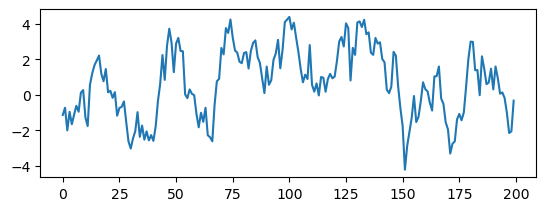

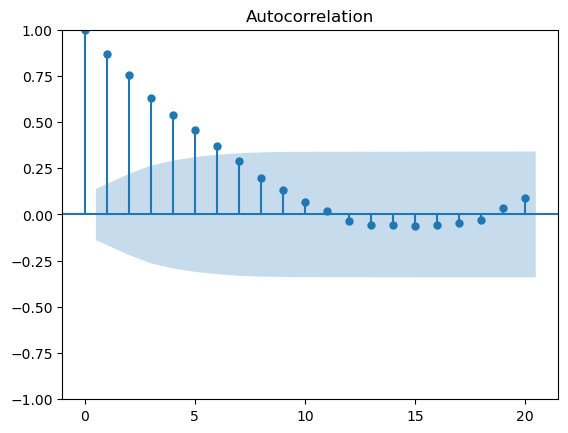

In [7]:
plt.subplot(2,1,1)
plt.plot(profit.Profit)
plt.show()


plot_acf(profit.Profit,lags=20)
plt.show()

In [8]:
adf_test(profit.Profit)

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -3.759318
p-value                          0.003352
#Lags Used                       0.000000
Number of Observations Used    199.000000
Critical Value (1%)             -3.463645
Critical Value (5%)             -2.876176
Critical Value (10%)            -2.574572
dtype: float64


In [11]:
model = ARIMA(profit.Profit, order=(2,0,0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 Profit   No. Observations:                  200
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -275.424
Date:                Tue, 07 Nov 2023   AIC                            558.848
Time:                        21:17:55   BIC                            572.041
Sample:                             0   HQIC                           564.187
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5948      0.509      1.168      0.243      -0.403       1.593
ar.L1          0.8481      0.074     11.438      0.000       0.703       0.993
ar.L2          0.0221      0.071      0.313      0.7

In [16]:
y_hat = results.predict(start=200, end=204)
y_hat

200   -0.246393
201   -0.139028
202   -0.046167
203    0.034963
204    0.105823
Name: predicted_mean, dtype: float64

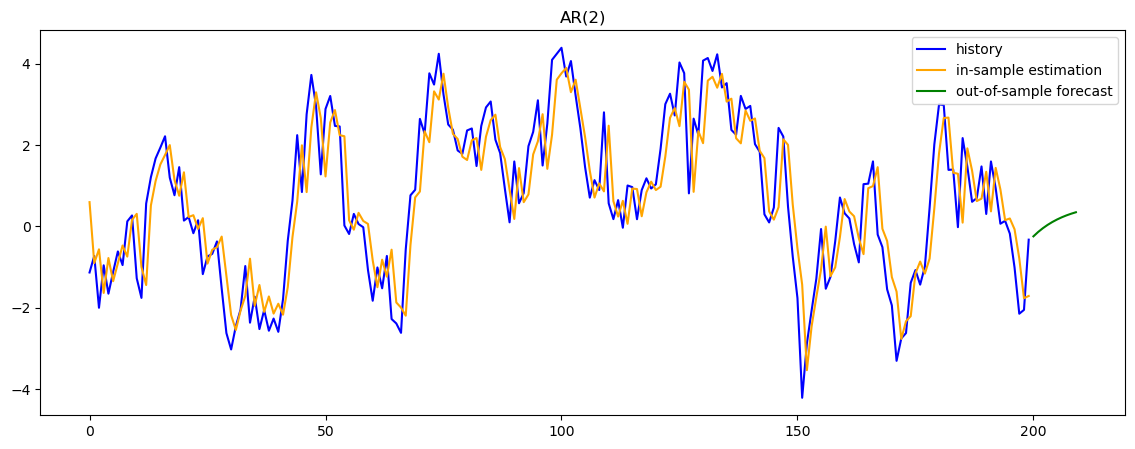

In [26]:

pred = results.predict(start=0, end=210)
history = profit.Profit[0:200]
estimation = pred[0:200]
forecast = pred[200:210]

history.columns =['x']
estimation.columns =['x']
forecast.columns =['x']

pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
history.plot(kind='line',y='x',color='blue', label='history', ax=ax)
estimation.plot(kind='line',y='x',color='orange', label='in-sample estimation', ax=ax)
forecast.plot(kind='line',y='x',color='green', label='out-of-sample forecast', ax=ax)
plt.title('AR(2)')
plt.legend()
plt.show()

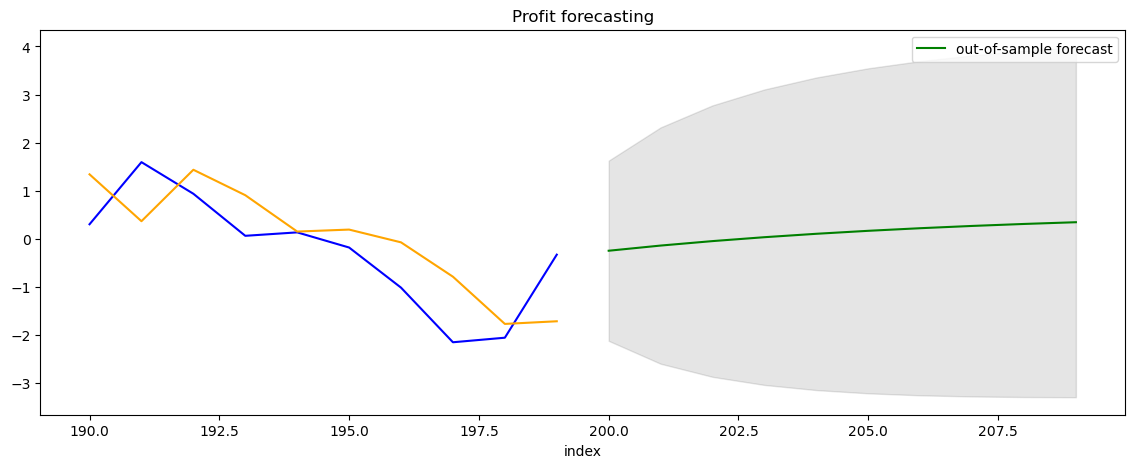

In [25]:
pred = results.predict(start=0, end=210)

history_new = profit.Profit[190:200]
estimation_new = pred[190:200]
forecast = results.get_forecast(10).summary_frame()
forecast['index']=range(200,210,1)

pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize=(14,5))
history_new.plot(kind='line',y='x',color='blue', label='history', ax=ax)
estimation_new.plot(kind='line',y='x',color='orange', label='in-sample estimation', ax=ax)
forecast.plot(kind='line',x='index',y='mean',color='green', label='out-of-sample forecast', ax=ax)
ax.fill_between(forecast['index'], forecast['mean_ci_lower'], forecast['mean_ci_upper'], color='k', alpha=0.1)
plt.title('Profit forecasting')
plt.show()